<a href="https://colab.research.google.com/github/luisana-RS/Math152/blob/main/P4M_Notebook_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 5:  Putting it together...

To wrap things up, we are going to bring together the techniques we have seen, and attempt a few challenges.

Please submit this notebook by 5pm (California time) on Wednesday, March 17th.  Your submission should include answers to all three questions from the first (Repetition and benchmarking) section, and **two** of the challenging problems.

## Repetition and benchmarking

Computers are very good at repetition.  As your programming skills improve, you can more easily coax your computer into performing more repetitions.  We have seen at least three ways of performing repetition:  with loops (e.g, for and while loops), with lists (especially slicing and comprehension), and with numpy arrays (especially vectorized functions).  

It is good to see this, in a simple example, to reflect on what you've learned this quarter.  Our simple example will be producing a list of squares $n^2$ for $n$ in a range of numbers.

The first things we learned were how to use Python as a calculator, printing "answers" to the screen, and using a "for loop" to repeat things.  Here is a bit of code in that spirit.

In [ ]:
for n in range(10):
  print(n*n)

0
1
4
9
16
25
36
49
64
81


Then we learned about lists.  Here are two ways to make a list of the squares, from $0^2$ up to $9^2$.  We print the list at the end of each code block.

In [ ]:
L = []
for n in range(10):
  L.append(n*n)
print(L)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [ ]:
L = [0]*10
for n in range(10):
  L[n] = n*n
print(L)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


Hopefully you learned to give your lists better names, like `square_list`.  A very slick Pythonic way of producing a list is with "list comprehension".  Such an approach is in the code below.

In [ ]:
square_list = [n*n for n in range(10)]
print(square_list)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


Finally, we learned about the numpy package, which pumps arrays through the processor very quickly.  A numpy approach is below.

In [ ]:
import numpy as np # First we have to load the package.

In [ ]:
A = np.arange(10)
print(A*A)

[ 0  1  4  9 16 25 36 49 64 81]


Let's consider the question:  what is the fastest way to produce a list (or array) of squares?  To answer it, we will wrap things in different functions, and carry out some time analysis.  

Notice that the functions are as identical as possible.  The method of creating a list/array is the different in each function.  But all the functions take a single input `N` and return a list or array with the squares of 0,...,N-1.  Note that there are **no print statements**!  Printing takes time, and we don't care about how much time it takes to *print* a list on your screen.  Also, if we run %timeit, then a print statement will fill your screen with tens of thousands of printed messages!

In [ ]:
def make_sq_1(N):
  L = []
  for n in range(N):
    L.append(n*n)
  return L

In [ ]:
def make_sq_2(N):
  L = [0] * N
  for n in range(N):
    L[n] = n*n
  return L

In [ ]:
def make_sq_3(N):
  return [n*n for n in range(N)]

In [ ]:
def make_sq_4(N):
  A = np.arange(N)
  return A*A

In [ ]:
%timeit make_sq_1(1000)

10000 loops, best of 5: 119 µs per loop


In [ ]:
%timeit make_sq_2(1000)

10000 loops, best of 5: 92.9 µs per loop


In [ ]:
%timeit make_sq_3(1000)

10000 loops, best of 5: 76.4 µs per loop


In [ ]:
%timeit make_sq_4(1000)

The slowest run took 70.06 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 2.91 µs per loop


In [ ]:
def make_sq_5(N):
  L = list(range(N))
  for n in range(N):
    L[n] = L[n] * n
  return L

In [ ]:
def make_sq_6(N):
  L = [0]*N
  for n in range(N):
    L[n] = n**2
  return L

In [ ]:
make_sq_5(10)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [ ]:
make_sq_6(10)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [ ]:
%timeit make_sq_5(1000)

10000 loops, best of 5: 130 µs per loop


In [ ]:
%timeit make_sq_6(1000)

1000 loops, best of 5: 396 µs per loop


These benchmarks are useful, but let's do a graphical analysis.  This is the last thing we studied.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # In case we want some modern stylings.
import time as time

Now we are going to create a graph to benchmark the performance of these three functions.  This will use a few new programming techniques.

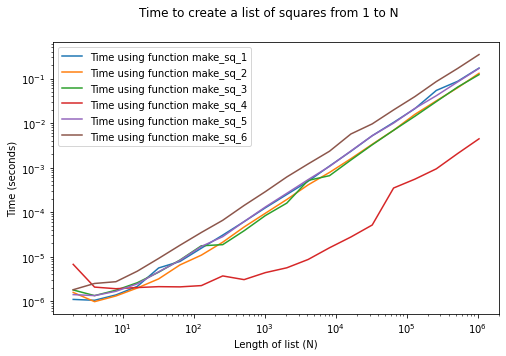

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(8,5)) # Initialize a plot.
N_array = np.array([2**n for n in range(1,21)]) # We'll try N in the array [2,4,8,..,~1 million]
for method in [make_sq_1, make_sq_2, make_sq_3, make_sq_4, make_sq_5, make_sq_6]: # A list of functions, oh my!
  time_array = np.zeros(len(N_array)) # Initialize an array of zeros
  for j,N in enumerate(N_array):  # See notes afterwards about the enumerate command.
    time_tot = 0
    for reps in range(10): # Average of 10 repetitions.
      start_time = time.time()
      method(N)
      end_time = time.time()
      time_tot += end_time - start_time
    time_ave = time_tot / 10
    time_array[j] = time_ave
  plt.plot(N_array, time_array, label='Time using function '+method.__name__)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.suptitle('Time to create a list of squares from 1 to N')
plt.xlabel('Length of list (N)')
plt.ylabel('Time (seconds)')
plt.show()

Let's do a line-by-line analysis.

1.  `fig,ax = plt.subplots(1,1,figsize=(8,5))`

2.  `N_array = np.array([2**n for n in range(1,21)])`

3.  `for method in [make_sq_1, make_sq_2, make_sq_3, make_sq_4]:`

4.  `  time_array = np.zeros(len(N_array)) # Initialize an array of zeros`

5.  `  for j,N in enumerate(N_array):`

6.  `    time_tot = 0`
    `for reps in range(10):`
      `start_time = time.time()`
      `method(N)`
      `end_time = time.time()`
      `time_tot += end_time - start_time`
    `time_ave = time_tot / 10`

    `time_array[j] = time_ave`
7.    `plt.plot(N_array, time_array, label='Time using function '+method.__name__)`

8.  `plt.legend()`

9.  `plt.xscale('log')`
10. `plt.yscale('log')`

Line 1 initializes a plot, with figure size 8 inches by 5 inches.  The "1,1" means that the plot has no subplots, or more precisely, it is a 1 by 1 grid of plots.  (Only one plot).

In line 2, we use a list comprehension to make a list [2,4,8,16,..., 2^20].  Note that 2^20 is about one million.  These are the N's that we're going to work with.

Line 3 might be surprising and interesting.  The variable `method` is iterated through an array of four *functions*!  Yes, we can have a list of functions!  And then we can use those functions!  Functions are Python objects like any other, and they can be treated as such.

Lines 4-6 create an array of times.  Instead of using the %timeit magic, we store our times in an array, and we carry out a timing experiment from scratch.  Line 4 just initializes a numpy array of zeros to fill later.

Line 5 has a new command `enumerate` in the loop.  This makes `N` iterate through our `N_array`, and meanwhile `j` will simply "count up".  It's equivalent to setting `j=0` before the loop, and putting a `j = j + 1` within the loop to count.

Line 6 carries out the timing experiment.  It runs a function (`method`) to create a list of squares up to `N`.  It does this 10 times, checking the time before and after each time.  Then it computes the average amount of time elapsed (among the 10 repetitions) and records this in the `time_array`.

Line 7 plots `N` on the x-axis and time (`time_array`) on the y-axis with a line plot.  It assigns this plot a label, which is the name of the method.  To find the name of the function `method`, you can use `method.__name__`.  That's a bit fancier Python.

Finally, Line 8 produces the legend from the labels.  

Lines 9 and 10 make the x-axis and y-axis log-scaled, which is helpful since the variable `N` is increasing exponentially, and some times are as short as microseconds while others are closer to milliseconds or seconds.

The rest is styling.

## Exercises

1.  Interpret the plot above.  Which method is fastest for long lists?  Which method is fastest for short lists?  At what size `N` should you switch from one method to the other?

2.  Add another method to the plot, by defining your own function `make_sq_5` that mirros the basic structure of the other `make_sq` functions.  Note that your function must create the list in a different way, but it should still take the same parameter `N` and return a list or numpy array.  Create the plot with your function added to the other four, and compare the performance of your method to the others.

3.  Create a function with `def inflate(S):` which takes as input a string `S` and returns a string in which the 1st letter of `S` appears once, and the second letter appears twice, the third letter appears three times, etc.  For example, `inflate('Hello')` should return the string `'Heelllllllooooo'`.  You must use a loop of the form `for j,letter in enumerate(S):`, and *no other loops*!

1. The fastest method for long lists is make_sq_4, i.e. the numpy method. The fastest method for short lists is make_sq_3, i.e. the list comprehension method. You should switch from the 3rd to the 4th method when N is around  10**(2.1).

2. I made two new attempts: make_sq_5 & make_sq_6. make_sq_6 was the slowest except at the very beginning when it is lower than make_sq_4. make_sq_5 was the second fastest at the beginning then aligned with make_sq_1 as second slowest towards the end (after make_sq_6).


In [ ]:
#3.
def inflate(S):
  if type(S) != str:
    raise TypeError
  s = ""
  for j, letter in enumerate(S):
    j = j+1 #since j starts as 0
    s += (letter*j)
  return s 


In [ ]:
S = "it works!" 
inflate(S)


'itt   wwwwooooorrrrrrkkkkkkkssssssss!!!!!!!!!'

# Final challenges!

Please turn in your notebooks with your attempts on **two** of the challenges below.  **Only two** will be graded.

# Challenge 3

The following result was found by Euler, but I've changed his numbers to $A$ and $B$ to make your life hard.

Theorem:  A prime number $p$ can be expressed in the form $x^2 + 3 y^2$ if and only if $p$ is congruent to $A$ modulo $B$ (i.e., `p % B == A`).  

Use experimental techniques to determine $A$ and $B$.  Now try the same for $3$ replaced by $4,5,6,7,8,9$. 

## Solution

### Set Up code


In [40]:
from math import sqrt
def isprime_list(n):
    ''' 
    Return a list of length n+1
    with Trues at prime indices and Falses at composite indices.
    '''
    flags = [True] * (n+1)  # A list [True, True, True,...] to start.
    flags[0] = False  # Zero is not prime.  So its flag is set to False.
    flags[1] = False  # One is not prime.  So its flag is set to False.
    flags[4::2] = [False] * ((n-2)//2)
    p = 3
    while p <= sqrt(n):  # We only need to sieve by p is p <= sqrt(n).
        if flags[p]:  # We sieve the multiples of p if flags[p]=True.
            flags[p*p::2*p] = [False] * ((n-p*p-1)//(2*p)+1) # Sieves out multiples of p, starting at p*p.
        p = p + 2 # Try the next value of p.
        
    return flags
    
def where(L):
    return [n for n in range(len(L)) if L[n]]
    

In [41]:

def prime_form(N, c):
  p = where(isprime_list(N))
  a = []
  i = round(sqrt(N)+0.5) #making sure to always round up since this number wont actually be counted
  j = round(sqrt(N/3)+0.5)
  for x in range(1, i): #less than 100
    for y in range(1, j): #(3*y^2) less than 100 
      z = x**2 + c*(y**2)
      if z in p:
        a.append(z)
  a.sort()
  return a

def check_congruence(z):
  k = z[0]
  l = len(z)-1 #4
  b = []
  for i in range(2, k): #not mod 2 since every prime is 2 % 1
    A = z[0] % i 
    a = 0 #goin to add to this number; if it gets to be == to len(b)-1 then all work for the mod set up
    for j in range(1, len(z)): 
      if A == z[j] % i: 
        a += 1
      else:
        a = 0
    if a == l: 
      b.append(i)
  l_2= len(b)
  if l_2 ==0:
    return []
  else: 
    B = b[-1] 
    return [A, B]

def confirm_congruence(z, N, A, B):
  p = where(isprime_list(N))
  y = []
  for i in p:
    if i % B == A:
      y.append(i)
  if y == z:
    return True


### Checking iff

In [47]:
n = 50000 #check for primes under 100
a = prime_form(n, 3)
b = check_congruence(a)
print(b)
confirm_congruence(a, n, b[0], b[1])

##This proves that for primes up to 50,000, it holds true that primes can be expressed in the form x^2+3*y^2 IFF p % 6 == 1 (or p % 3 == 1)

[1, 6]


True

### Trials having c range from 4 to 9 (x^2 + c*y^2)

In [48]:
n = 5000 #check for primes under 100
a = prime_form(n, 4)
b = check_congruence(a)
print(b)
confirm_congruence(a, n, b[0], b[1])

##This proves that for primes up to 5000, it holds true that primes can be expressed in the form x^2+4*y^2 IFF p % 4 == 1

[1, 4]


True

In [50]:
n = 5000 #check for primes under 100
a = prime_form(n, 5)
b = check_congruence(a)
print(b)
confirm_congruence(a, n, b[0], b[1])

#x^2 + 5*y^2 is NOT IFF p % 4 == 1

[1, 4]


In [51]:
n = 5000 #check for primes under 100
a = prime_form(n, 6)
b = check_congruence(a)
print(b)
confirm_congruence(a, n, b[0], b[1])

#x^2 + 6*y^2 is NOT IFF p % 6 == 1

[1, 6]


In [53]:
n = 5000 #check for primes under 100
a = prime_form(n, 7)
b = check_congruence(a)
print(b)
confirm_congruence(a, n, b[0], b[1])

#x^2 + 7*y^2 is NOT IFF p % 2 == 1

[1, 2]


In [55]:
n = 5000 #check for primes under 100
a = prime_form(n, 8)
b = check_congruence(a)
print(b)
confirm_congruence(a, n, b[0], b[1])

#x^2 + 8*y^2 is NOT IFF p % 8 == 1

[1, 8]


True

In [56]:
n = 5000 #check for primes under 100
a = prime_form(n, 9)
b = check_congruence(a)
print(b)
confirm_congruence(a, n, b[0], b[1])

#x^2 + 9*y^2 is NOT IFF p % 12 == 1

[1, 12]


True

# Challenge 4

Pascal's triangle has $1$ in the first row, then $1, 1$ in the second rod, then $1,2,1$ in the third row, etc.  One can place these numbers in a triangle, with "rows" as diagonals, as drawn below.

1 1 1 1 1 1

1 2 3 4 5

1 3 6 10

1 4 10

1 5

1

Et cetera.

Turn these numbers into black and white dots, depending on whether they are even (black) or odd (white).  This produces an image like the following:

X X X X X X

X O X O X

X X O O

X O O

X X

X

Now perform this in PIL, to create an image that fills the top-left triangle in an image of at least 200 x 200 pixels.  You should *not* be computing giant numbers like 200 factorial!  Each row of Pascal's triangle can be computed from the previous by addition... and you can perform this "mod 2" all the way through.

Extra fun:  instead of black/white dots for even/odd, try colors based on remainders after dividing by three, by four, etc.


## Solution

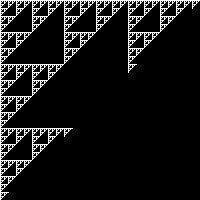

In [ ]:
import numpy as np

#True represents odd since False + False = False thus False must be even
p = np.zeros((200,200), dtype=np.uint8)


p[0, :] = 1
p[:, 0] = 1
for n in range(1, 199): #so that it does not compute p[200, 1]
  for m in range(1, 199):
    if n+m <= 200:
      p[n, m] = ((p[n, m-1] + p[n-1, m]) % 2)

#np.set_printoptions(formatter={'float_kind':'{:f}'.format})
p

from PIL import Image 

solid = np.zeros((200, 200,3), dtype=np.uint8)
for x in range(200):
  for y in range(200):
    if p[x, y] == 1:    
        solid[y, x] = [255,255, 255] # Red = 255, Green = 255, Blue = 255 == black
    else:
        solid[y, x] = [0, 0, 0]
img = Image.fromarray(solid) # Create an image from the array.
display(img)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  del sys.path[0]


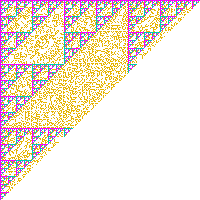

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in ubyte_scalars


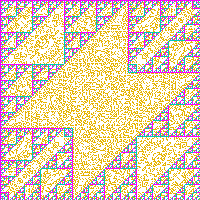

In [ ]:
import numpy as np

#no longer bool (1 and 0s) so it is a little slower
#can use this for later "fun"

p = np.zeros((200,200), dtype=np.uint8)

p[0, :] = 1
p[:, 0] = 1
for n in range(1, 199): #so that it does not compute p[200, 1]
  for m in range(1, 199):
    if n+m <= 200:
      p[n, m] = p[n, m-1] + p[n-1, m]

#np.set_printoptions(formatter={'float_kind':'{:f}'.format})
p

from PIL import Image 

solid2 = np.zeros((200, 200,3), dtype=np.uint8)
for x in range(200):
  for y in range(200):
    if p[x, y] % 4 == 1:    
        solid2[y, x] = [250,0, 255] # Red = 255, Green = 255, Blue = 255 == black
    elif p[x, y] % 4 == 3:
        solid2[y, x] = [0, 200, 180]
    elif p[x, y] % 3 == 2:
        solid2[y, x] = [230, 180, 0]
    elif p[x, y] % 2 == 0:
        solid2[y, x] = [255, 255, 255]
    elif p[x, y] % 2 == 1:
        solid2[y, x] = [0, 0, 0]
img = Image.fromarray(solid2) # Create an image from the array.
display(img)

#symmetric
for n in range(1, 199): #so that it does not compute p[200, 1]
  for m in range(1, 199):
    if (n+m) <= 200:
      p[-n, -m] = p[-n, -m+1] + p[-n+1, -m]


solid3= np.zeros((200, 200,3), dtype=np.uint8)
for x in range(200):
  for y in range(200):
    if p[x, y] % 4 == 1:    
        solid3[y, x] = [250,0, 255] # Red = 255, Green = 255, Blue = 255 == black
    elif p[x, y] % 4 == 3:
        solid3[y, x] = [0, 200, 180]
    elif p[x, y] % 3 == 2:
        solid3[y, x] = [230, 180, 0]
    elif p[x, y] % 2 == 0:
        solid3[y, x] = [255, 255, 255]
    elif p[x, y] % 2 == 1:
        solid3[y, x] = [0, 0, 0]
img = Image.fromarray(solid3) # Create an image from the array.
display(img)